In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [60]:
from functools import reduce
import operator

In [79]:
def array_to_pos_center_coordinates(X):
    coordinates_nonzero = np.nonzero(X > 0)

    # nonzero gives ([x, x, x], [y, y, y]), stack to get (x, y), (x, y), (x, y)
    return zip(*coordinates_nonzero)

In [187]:
x = np.zeros((11, 11), dtype=int)
x[0, 10] = 1
x[10, 0] = 1

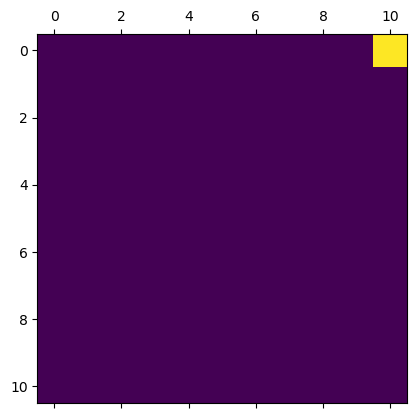

In [180]:
fig, ax = plt.subplots()
ax.matshow(x)

display()

In [181]:
def manhattan_neighborhood(coor, radius, prune_wraparound=True, size=(11, 11)): # SIZE IS HEIGHT, WIDTH
    x, y = coor
    
    neighborhood = set()
    
    for d_x in range(0, radius + 1):
        for d_y in range(0, radius + 1):
            if radius >= d_x + d_y > 0: # > 0 excludes center
                neighborhood.update(
                    [
                        (x + d_x, y + d_y),
                        (x - d_x, y + d_y),
                        (x + d_x, y - d_y),
                        (x - d_x, y - d_y),
                    ]
                )

    if prune_wraparound:
        # Bounds subtract 1 because of zero indexing
        x_max, y_max = size[0] - 1, size[1] - 1
        return {
            (x, y) for (x, y) in neighborhood if (0 <= x <= x_max) & (0 <= y <= y_max)
        }

    return neighborhood


In [182]:
manhattan_neighborhood((0, 5), 2, prune_wraparound=True)

{(0, 3), (0, 4), (0, 6), (0, 7), (1, 4), (1, 5), (1, 6), (2, 5)}

In [176]:
manhattan_neighborhood((10, 0), 3, prune_wraparound=True)

{(7, 0), (8, 0), (8, 1), (9, 0), (9, 1), (9, 2), (10, 1), (10, 2), (10, 3)}

In [183]:
def count_positive_neighborhood_size(X, radius):
    positive_centers = list(array_to_pos_center_coordinates(X))

    all_neighbors = reduce(
        operator.or_, # or_ for Sets is union
        [
            manhattan_neighborhood(center, radius, size=X.shape)
            for center in positive_centers
        ]
    )

    all_neighbors.update(positive_centers)

    return len(all_neighbors)

In [184]:
def plot_point_with_mask(
    coors,
    neighborhood,
    dim=(11, 11),
):
    arr = np.zeros(dim)
    for coor in coors:
        arr[coor] = 1

    for neighbor in neighborhood:
        arr[neighbor] = 0.5

    fig, ax = plt.subplots()
    ax.matshow(arr)

    ax.set_xticks(np.arange(dim[0]) + 0.5)
    ax.set_yticks(np.arange(dim[1]) + 0.5)

    ax.set_xticklabels(
        [str(x) for x in np.arange(dim[0])]
    )

    ax.set_yticklabels(
        [str(y) for y in np.arange(dim[1])]
    )

    ax.scatter(
        [c[1] for c in coors],
        [c[0] for c in coors],
        marker='.',
        color="red",
    )
    ax.grid()
    
    display()

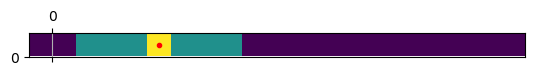

In [197]:
pt = [
    (0, 5),
]

HEIGHT, WIDTH = 1, 21

plot_point_with_mask(
    pt,
    reduce(operator.or_, [manhattan_neighborhood(p, 3, size=(HEIGHT, WIDTH)) for p in pt]),
    dim=(HEIGHT, WIDTH),
)

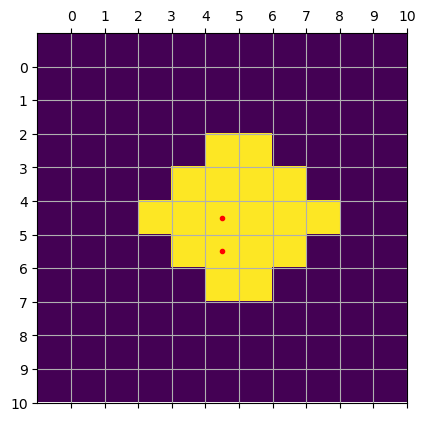

In [161]:
plot_point_with_mask(
    [(5, 5), (5, 6)],
    manhattan_neighborhood((5, 5), 2) | manhattan_neighborhood((5, 6), 2)
)

In [105]:
set([1, 2, 3]) | set([2, 3, 5])

{1, 2, 3, 5}

In [188]:
count_positive_neighborhood_size(x, 3)

20

In [201]:
from itertools import combinations, islice, product

In [205]:
list(islice(
    product((range(10), range(10))),
    5
))

[(range(0, 10),), (range(0, 10),)]

In [209]:
l = combinations(
    range(10),
    2
)

In [210]:
list(l)

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 8),
 (7, 9),
 (8, 9)]